## CS634 Project 1 (Midterm Project)

Name: Pablo Salar Carrera<br>
UCID: ps2255<br>
Instructor: Dr. Yasser<br>
Class: CS634<br>

### Abstract<br>

In this project, I explore a Brute Force algorithm, the Apriori algorithm, and the FP-Growth algorithm. I used these data mining techniques in order to find frequent itemsets and association rules given a minimum support and a minimum confidence for different datasets. Moreover, I test the time each algorithm needs to find the frequent itemsets, hence we can determine what algorithm will be better when using large datasets. 


### Introduction <br>
Data mining is an essential method for obtaining insightful information from big datasets, which makes it possible to find hidden relationships and patterns. The FP-Growth, Apriori, and Brute Force algorithms are the main focus of this project. We will examine the fundamental ideas and principles of data mining that guide our work, with an emphasis on the creation and interpretation of association rules. <br>
The primary objective of these algorithms is to establish associations among items in transactions. To achieve this, we begin by identifying the most frequently ocurring items within the provided transaction list. Based on the user's specified support parameter, we calculate the support for each item. By eliminating those that do no meet this threshold, we streamline the dataset for analysis. Then, incrementally expanding itemeset sizes while filtering out those that fail to meet the minimum support criteria, the algorithm generates association rules. <br>
In this implementation, the algorithms are applied to a customized dataset reflecting retail transactions, allowing us to discover frequent itemsets and generate association rules. The key stages of this process included:<br>
* Loading transaction data from CSV files 
* Preprocessing the dataset to maintain order and uniqueness among items
* Gathering user input to define minimum support and confidence
* Iteratively generating candidate itemsets and updating frequent itemsets through the algorithms
* Generating association rules using the frequent itemsets found by each algorithm
<br>
### Core Concepts and Principles: <br>
##### Frequent Itemset Discovery:
The algorithms are centered around identifying frequent itemsets, which are groups of items that frequently appear together in transactions. These sets provide insights into customer purchasing patterns and preferences. <br>
##### Support and Confidence:
Two fundamental metrics in data mining are support, which measures the frequency of occurrence of an item or itemset, and confidence, which evaluates the probability of items being bought together. These metrics are crucial for guiding our analytical process. <br>
##### Association Rules: 
By establishing robust association rules, we can identify pairs or groups of items that are frequently purchased together. These insights are essential for enhancing sales strategies, such as targeted recommendations. <br>

### Project Workflow:
1. Data Loading and Preprocessing: We initiate the project by importing transaction data from a retail dataset, ensuring each transaction lists the items purchased. Data preprocessing is performed to ensure item uniqueness and proper ordering
2. Determing Minimum Support and Confidence: User input is integral to our analysis. We collect preferences for minimum support and confidence levels to filter out less significant patterns. It is important to remark that the minimum support and confidence range from 1 to 100, the program will not run if the user input is not an integer number in that range. 
3. Defining the function for support counts: For each candidate itemset, we compute its support by counting its occurrences across transactions. 
4. Defining the frequent itemset list function. It uses the support counts functions to check for frequent itemsets in the dataset. Itemsets that fall below the minimum support threshold are excluded from further analysis.
5. Defining the association rules function. We extract association rules that satisfy both the minimum support and confidence criteria, uncovering significant insights into frequently purchased item combinations.
6. Defining the brute force algorithm. It uses the previous two functions in order to give the results one we choose a dataset. Additionally, it calculates the running time for the algorithm to find the final solution.
7. Results and Evaluation: The project's success is measured through performance indicators such as support, confidence, and the derived association rules. Additionally, we will compare the three algorithms implementation and the running time each algorithm needs to find a solution

### Results and Evaluation:
The project success is measured through performance indicators such as support, confidence, and the derived association rules. <br>
Please find some examples of the results at the end of report.

### Conclusion:
In conclusion, after running the code several times, we can observe that the brute force algorithm is the fastes algorithm when dealing with small datasets. However, when running the large dataset, the best algorithm is the FP-Growth algorithm, then the Apriori, and the slowest the brute force algorithm. When it comes to the results, all the algorithms give the same frequent itemsets and association rules.

### Tutorial: 
Please find below the code and each step to be able to work on it. 

Import all required packages

In [5]:
import time
import pandas as pd
import numpy as np
from itertools import combinations 
from collections import defaultdict
from IPython.display import display


Prompts to ask the user which store they want to select. First, the program allows the use to choose from six different datasets: <br>
* Amazon
* Best Buy
* K-mart
* Nike
* Supermarket
* Large Transactional Data
The user inputs a number corresponding to the dataset they want to analyze. The script validates the input to ensure it is a valid dataset choice and loads the respective transaction data (_Transactions.csv) and item names (_itemNames.csv).
After loading the data, the program preprocesses the transactions:
* Transactions are split by commas.
* Duplicates are removed, and the items are sorted according to the predefined order from the item list. 
* The resulting transaction data is used for frequent itemset mining. 
Then, the user is asked to input values for:
* Minimum Support: Defines the threshold for itemsets to be considered frequent.
* Minimum Confidence: Defines the threshold for rule generation based on the confidence of association rules.
###### Important!!! Both values must be provided as integers between 1 and 100, representing percentages

In [8]:
selected_dataset = input("Please select the dataset:\n1. Amazon\n2. Best Buy\n3. K-mart\n4. Nike\n5. Supermarket\n6. LargeTransactionalData\n")
# Check if the user wants to quit
if selected_dataset == '7':
    quit()

# List of datasets
datasets = ('Amazon', 'BestBuy', 'K-mart', 'Nike', 'Supermarket', 'LargeTransactionalData')

# Validate user input for store selection
try:
    selected_dataset = int(selected_dataset)
    if selected_dataset < 1 or selected_dataset > len(datasets):
        print("Invalid dataset selection. Please enter a valid number.")
        quit()
except ValueError:
    print("Invalid input. Please enter a valid number.")
    quit()

# Load the selected dataset 
df_transactions = pd.read_csv(datasets[selected_dataset - 1] + "_Transactions.csv")
df_itemset = pd.read_csv(datasets[selected_dataset - 1] + "_itemNames.csv")
print(f"You have selected the dataset {datasets[selected_dataset - 1]}.csv")

# Define the order of items
order = sorted(df_itemset['Item Name'])

# Preprocess the dataset
dataset = []
for lines in df_transactions['Transaction']:
    transaction = list(lines.strip().split(', '))
    transaction_1 = list(np.unique(transaction))
    transaction_1.sort(key = lambda x: order.index(x))
    dataset.append(sorted(transaction_1))

transaction_num = len(dataset)

# User input for minimum support and confidence
minimum_support = input("Please enter the minimum support as an integer percentage (value from 1 to 100): ")

try:
    # Convert input to integer
    minimum_support = int(minimum_support)
    
    # Check if the value is in the acceptable range (1 to 100)
    if not (1 <= minimum_support <= 100):
        print("Error: Minimum support must be an integer between 1 and 100.")
        quit()
    print(f"Minimum support is set to {minimum_support}%")

except ValueError:
    print("Error: Minimum support must be a valid integer between 1 and 100.")
    quit()
    
minimum_confidence = input("Please enter the minimum confidence as an integer percentage (value from 1 to 100): ")

try:
    # Convert input to integer
    minimum_confidence = int(minimum_confidence)
    
    # Check if the value is in the acceptable range (1 to 100)
    if not (1 <= minimum_confidence <= 100):
        print("Error: Minimum confidence must be an integer between 1 and 100.")
        quit()
        
    print(f"Minimum confidence is set to {minimum_confidence}%")

except ValueError:
    print("Error: Minimum confidence must be a valid integer between 1 and 100.")
    quit()

Please select the dataset:
1. Amazon
2. Best Buy
3. K-mart
4. Nike
5. Supermarket
6. LargeTransactionalData
6
You have selected the dataset LargeTransactionalData.csv
Please enter the minimum support in % you want (value from 1 to 100): 3
Please enter the minimum confidence in % you want (value from 1 to 100): 5


Then, we define a function to calculate the support of each itemset.

In [9]:
def support_calc(itemset, dataset):
    count = sum(1 for transaction in dataset if set(itemset).issubset(transaction))
    return count / len(dataset)

Then, we define the function frequent_itemset_list() that generates frequent itemsets starting with 1-itemsets and combining itemsets iteratively.

In [10]:
def frequent_itemset_list(dataset, items, min_support):
    frequent_itemset = [] # Initialize frequent itemset list
    k = 1 # Start with 1-itemsets
    current_itemsets = [[item] for item in items] 
    
    while current_itemsets:
        frequent_k_itemsets = []
        for itemset in current_itemsets:
            support = support_calc(itemset, dataset)
            if support >= min_support:
                frequent_k_itemsets.append(itemset)
                frequent_itemset.append((itemset, support))
                
        if not frequent_k_itemsets:
            break
            
        k += 1 # Generate (k+1)-itemsets
        
        new_itemset = []
        
        for i in frequent_k_itemsets:
            for j in frequent_k_itemsets:
                
                itemset_union = set(i).union(set(j))
                
                if len(itemset_union) == k:
                    new_itemset.append(list(itemset_union))
        
        current_itemsets = new_itemset
        
        # Deduplicate frequent itemsets
        
        unique_itemsets = set(tuple(sorted(item)) for item in current_itemsets)
        current_itemsets = [list(itemset) for itemset in unique_itemsets]
    
    return frequent_itemset
            

Here, we define the function Association_rules() that calculates the association rules using the generated frequent itemsets.

In [5]:
def Association_rules(frequent_itemsets, dataset, min_confidence):
    rules = []
    for itemset, support in frequent_itemsets:
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    consequent = tuple(set(itemset) - set(antecedent))
                    antecedent_support = support_calc(antecedent, dataset)
                    confidence = support / antecedent_support
                    if confidence >= min_confidence:
                        rules.append((antecedent, consequent, confidence))
    rules_formatted = []
    for antecedent, consequent, confidence in rules:
        antecedent_formatted = '&'.join(antecedent)
        consequent_formatted = '&'.join(consequent)
        rule_formatted = (f"{antecedent_formatted} -> {consequent_formatted} (Confidence: {confidence:.3f})")
        rules_formatted.append(rule_formatted)    
    
    return rules_formatted


After, we define the brute force algorithm implemented in the function brute_force(). It works by: <br>
* Generating frequent itemsets based on user-defined minimum support. 
* Computing association rules using the generated frequent itemsets and checking their confidence against the minimum confidence threshold. 
Moreover, the algorithm measures the running time it needs to find a solution. 

In [ ]:
def brute_force(dataset, order, min_support, min_confidence):
    
    start_time = time.time()
    # Generate frequent itemsets
    frequent_itemsets = frequent_itemset_list(dataset, order, min_support/100)
    if len(frequent_itemsets)>0:
        print(f"Frequent itemsets: ")
        for itemset, support in frequent_itemsets:
            itemset_formatted = ' & '.join(itemset)
            print(f"[{itemset_formatted}] (Support: {support:.3f})")
        
    else:
        print("No frequent itemsets found satisfying the given support.")
    
    # Generate association rules
    rules = Association_rules(frequent_itemsets, dataset, min_confidence/100)
    elapsed_time = time.time() - start_time
    if len(frequent_itemsets)>0:
        print(f"Association rules: ")
        for rule in rules:
            print(rule)
    
    elapsed_time = time.time() - start_time

    print(f"Timing Performance: \033[1m{elapsed_time:4f} seconds\033[0m")

    return frequent_itemsets, rules, elapsed_time


Then, we implement the brute force algorithm to find the frequent itemsets, the association rules, and the running time.

In [12]:
print("\n\033[1mBrute Force Algorithm Results:\n\033[0m")
frequent_itemsets_brute_force, rules_brute_force, elapsed_time_brute_force = brute_force(dataset, order, minimum_support, minimum_confidence)


Brute Force Algorithm Results:

Frequent itemsets: 
[Air Freshener] (Support: 0.036)
[Apple] (Support: 0.036)
[BBQ Sauce] (Support: 0.036)
[Baby Wipes] (Support: 0.036)
[Banana] (Support: 0.036)
[Bath Towels] (Support: 0.036)
[Beef] (Support: 0.036)
[Bread] (Support: 0.036)
[Broom] (Support: 0.036)
[Butter] (Support: 0.036)
[Canned Soup] (Support: 0.036)
[Carrots] (Support: 0.036)
[Cereal] (Support: 0.036)
[Cereal Bars] (Support: 0.036)
[Cheese] (Support: 0.036)
[Chicken] (Support: 0.036)
[Chips] (Support: 0.036)
[Cleaning Rags] (Support: 0.036)
[Cleaning Spray] (Support: 0.036)
[Coffee] (Support: 0.036)
[Deodorant] (Support: 0.036)
[Diapers] (Support: 0.036)
[Dish Soap] (Support: 0.036)
[Dishware] (Support: 0.036)
[Dustpan] (Support: 0.036)
[Eggs] (Support: 0.036)
[Extension Cords] (Support: 0.036)
[Feminine Hygiene Products] (Support: 0.036)
[Garden Hose] (Support: 0.036)
[Hair Gel] (Support: 0.036)
[Hand Sanitizer] (Support: 0.036)
[Honey] (Support: 0.036)
[Ice Cream] (Support: 0.0

Before implementing the apriori and fpgrowth algorithms, we have to import the following from the mlxtend library.

In [17]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

We define the apriori algorithm which needs to transform the transactions into a one-hot encoded format before running the algorithm. Therefore, first, we transform the transaction dataset into one-hot encoding. Then, we use the existing apriori() function from the mlxtend library to generate frequent itemsets. Finally, we use the association_rules() function from the mlxtend library to generate rules. The output the function gives are the following: <br>
* The frequent itemsets and their support values
* Association rules along with antecedents, consequents, and confidence values
* Total execution time for the Apriori algorithm

In [18]:
def Apriori(dataset, min_support):
    
    df = pd.DataFrame([[item for item in transaction] for transaction in dataset])
    
    one_hot = df.stack().str.get_dummies()
    one_hot = one_hot.groupby(level=0).sum()
    
    start_time = time.time()
    frequent_itemsets = apriori(one_hot, min_support=minimum_support/100, use_colnames=True)
    if frequent_itemsets.empty:
        print("No frequent itemsets found satisfying the given support.")
        return frequent_itemsets, pd.DataFrame(), 0

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minimum_confidence/100)
    elapsed_time = time.time() - start_time
    
    return frequent_itemsets, rules, elapsed_time

The last function we define is the FP-Growth algorithm, which is also implemented using the mlxtend library. It is similar to the Apriori algorithm since it uses the one-hot encoding of the transactions. Hence, first, we convert the dataset into one-hot encoded format. Then, we use the fpgrowth() function in the mlxtend library to generate frequent itemsets. Finally, we use the association_rules() function from the mlxtend library to generate associaton rules. The final output looks the same as the Apriori algorithm, and is the following: 
* The frequent itemsets and their support values.
* Association rules and confidence values.
* Total execution time for the FP-Growth algorithm

In [19]:
def Fpgrowth(dataset, min_support):
    transactions = [[item for item in transaction] for transaction in dataset]
    
    df = pd.DataFrame(transactions)
    
    one_hot = df.stack().str.get_dummies()
    one_hot = one_hot.groupby(level=0).sum()
    
    start_time = time.time()
    frequent_itemsets = fpgrowth(one_hot, min_support=minimum_support/100, use_colnames=True)
    if frequent_itemsets.empty:
        print("No frequent itemsets found satisfying the given support.")
        return frequent_itemsets, pd.DataFrame(), 0

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minimum_confidence/100)
    elapsed_time = time.time() - start_time
    
    return frequent_itemsets, rules, elapsed_time

Then, we import warnings, and set it up so we suppress warning of a specific type, in this case, DeprecationWarning. Thus, our output will look cleaner.

In [20]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


Then, we implement the Apriori algorithm and compare the results with the brute force algorithm.

In [24]:
### Implement Apriori Algorithm
print("\n\033[1mApriori Algorithm Results:\n\033[0m")
frequent_itemsets_apriori, rules_apriori, elapsed_time_apriori = Apriori(dataset, minimum_support/100)
if not frequent_itemsets_apriori.empty:
    print("Apriori Frequent Itemsets: ")
    print(frequent_itemsets_apriori.to_string(index=True))
    print("Apriori Rules: ")
    print(rules_apriori[['antecedents', 'consequents', 'confidence']])
    print(f"Timing Performance: \033[1m{elapsed_time_apriori:4f} seconds\033[0m")
else: 
    print("No rules were found because there are no frequent itemsets.")


Apriori Algorithm Results:

Apriori Frequent Itemsets: 
     support                     itemsets
0   0.036266              (Air Freshener)
1   0.035748                      (Apple)
2   0.036046                  (BBQ Sauce)
3   0.036196                 (Baby Wipes)
4   0.036224                     (Banana)
5   0.036126                (Bath Towels)
6   0.036141                       (Beef)
7   0.035758                      (Bread)
8   0.035777                      (Broom)
9   0.035840                     (Butter)
10  0.035645                (Canned Soup)
11  0.036162                    (Carrots)
12  0.035740                     (Cereal)
13  0.035964                (Cereal Bars)
14  0.035975                     (Cheese)
15  0.035660                    (Chicken)
16  0.036152                      (Chips)
17  0.036279              (Cleaning Rags)
18  0.036185             (Cleaning Spray)
19  0.036038                     (Coffee)
20  0.036278                  (Deodorant)
21  0.035947       

Finally, we implement the FP-Growth algorithm and compare the results with the other two algorithms, so we can take our final conclusions. 

In [25]:
# Implement FP-Growth Algorithm
print("\n\033[1mFP-Growth Algorithm Results:\n\033[0m")
frequent_itemsets_fpgrowth, rules_fpgrowth, elapsed_time_fpgrowth = Fpgrowth(dataset, minimum_support/100)
if not frequent_itemsets_fpgrowth.empty:
    print("FP-Growth Frequent Itemsets: ")
    print(frequent_itemsets_fpgrowth.to_string(index=True))
    print("FP-Growth Rules: ")
    print(rules_fpgrowth[['antecedents', 'consequents', 'confidence']])
    print(f"Timing Performance \033[1m{elapsed_time_fpgrowth:.4f} seconds\033[0m")
else:
    print("No rules were found because there are no frequent itemsets.")


FP-Growth Algorithm Results:

FP-Growth Frequent Itemsets: 
     support                     itemsets
0   0.036090              (Shaving Cream)
1   0.036064                (Light Bulbs)
2   0.035872                    (Ketchup)
3   0.036485                  (Ice Cream)
4   0.036133                       (Milk)
5   0.036064                  (Olive Oil)
6   0.036026                   (Potatoes)
7   0.035758                      (Bread)
8   0.035742                    (Spinach)
9   0.036140                    (Mustard)
10  0.035753                    (Tissues)
11  0.035936                  (Dish Soap)
12  0.070949                 (Toothpaste)
13  0.035660                    (Chicken)
14  0.036324                       (Soda)
15  0.036127                      (Honey)
16  0.036046                  (BBQ Sauce)
17  0.036035                (Garden Hose)
18  0.036070                 (Trash Cans)
19  0.036007                (Pancake Mix)
20  0.035842                 (Mayonnaise)
21  0.035819   

## Side Notes<br>
To be able to run this code make sure to have installed the following libraries: pandas, numpy, mlxtend, time, warnings, and itertools.combinations. <br>
To install the libraries write the following in the terminal: pip install (name of the library). <br>
Another way to install the libraries is to write in a cell of the jupiter notebook: !pip install (name of the library). <br>
Moreover, it is important to have all the csv files, jupiter notebooks, and python files in the same folder in order to run the codes. 

### Results for the Nike Dataset

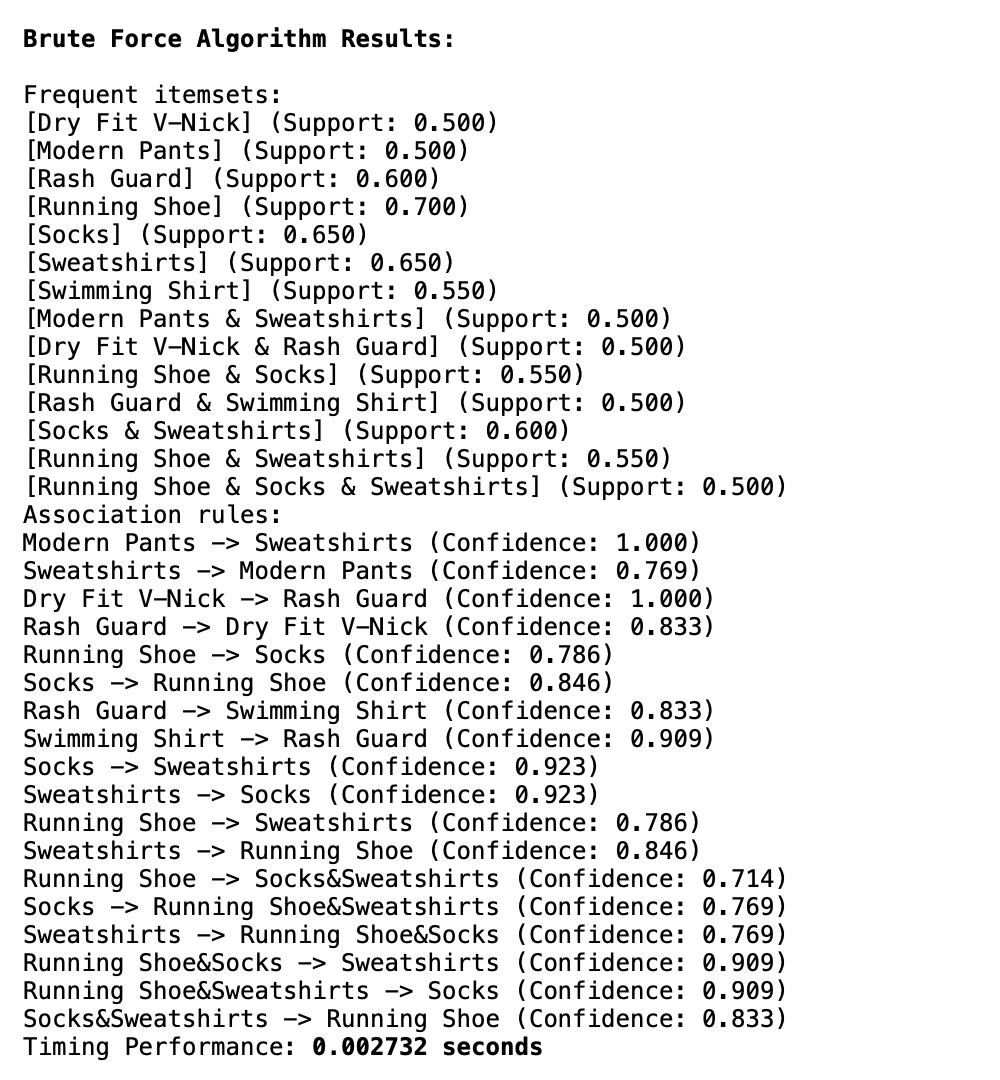

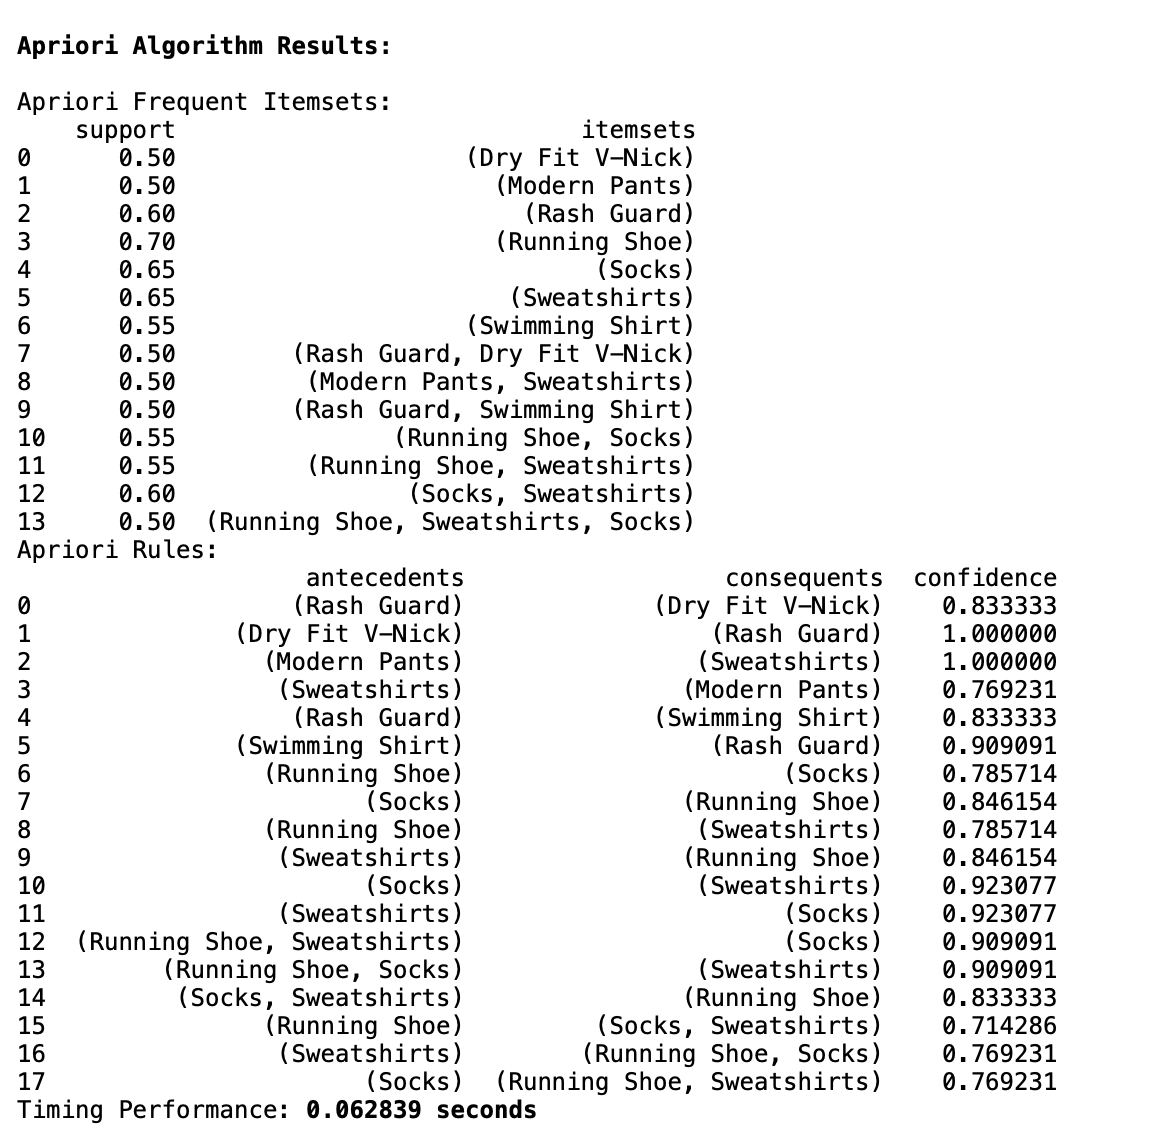

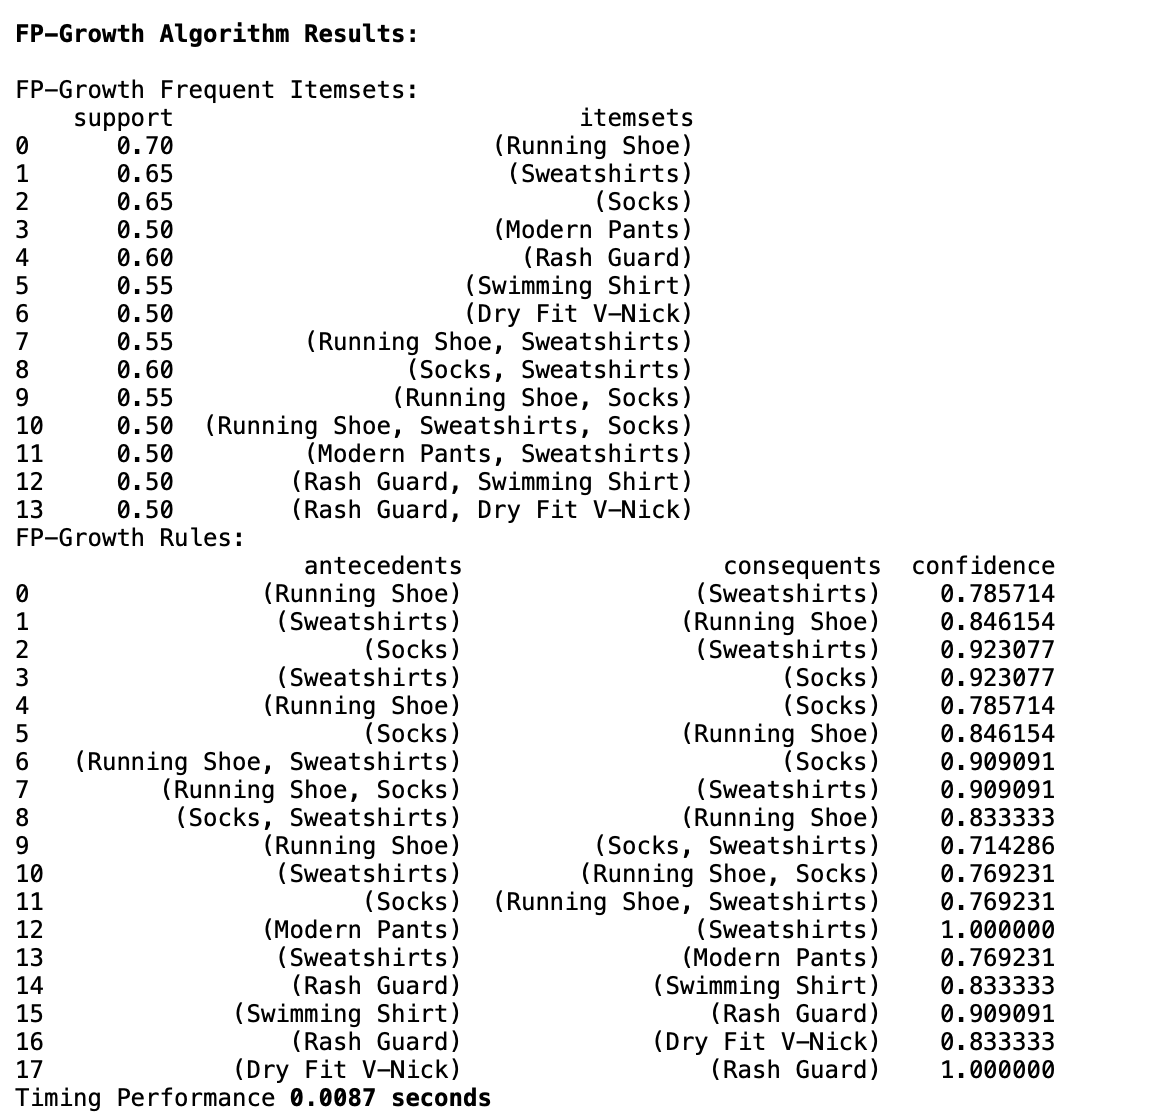

### Results for the Large Dataset

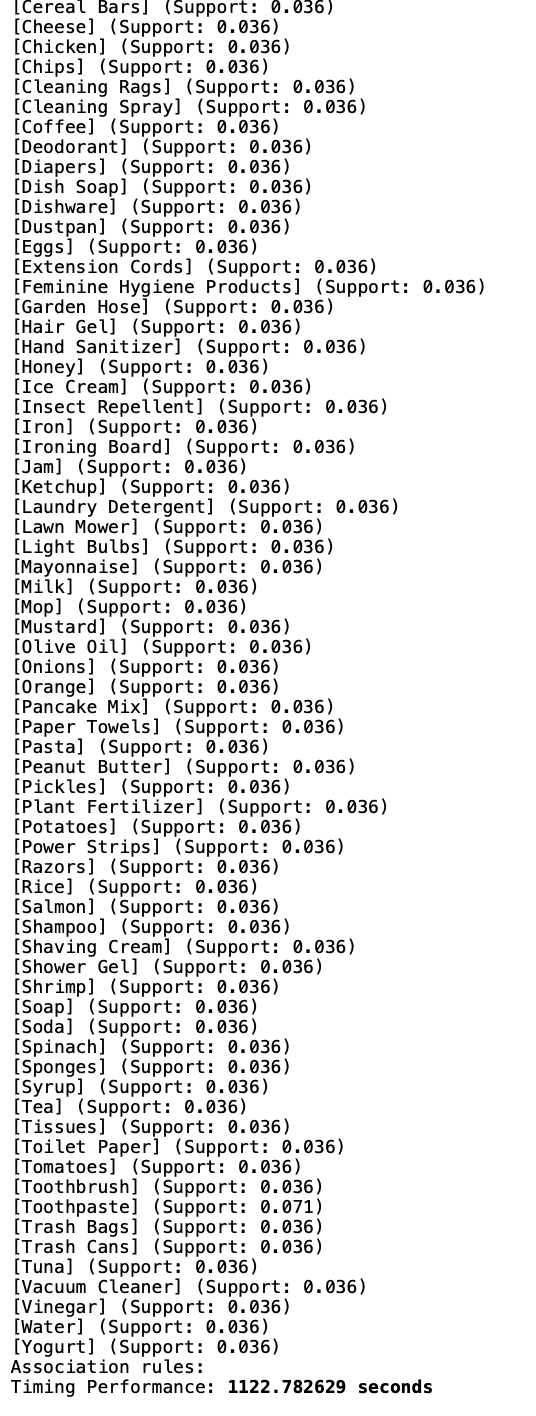

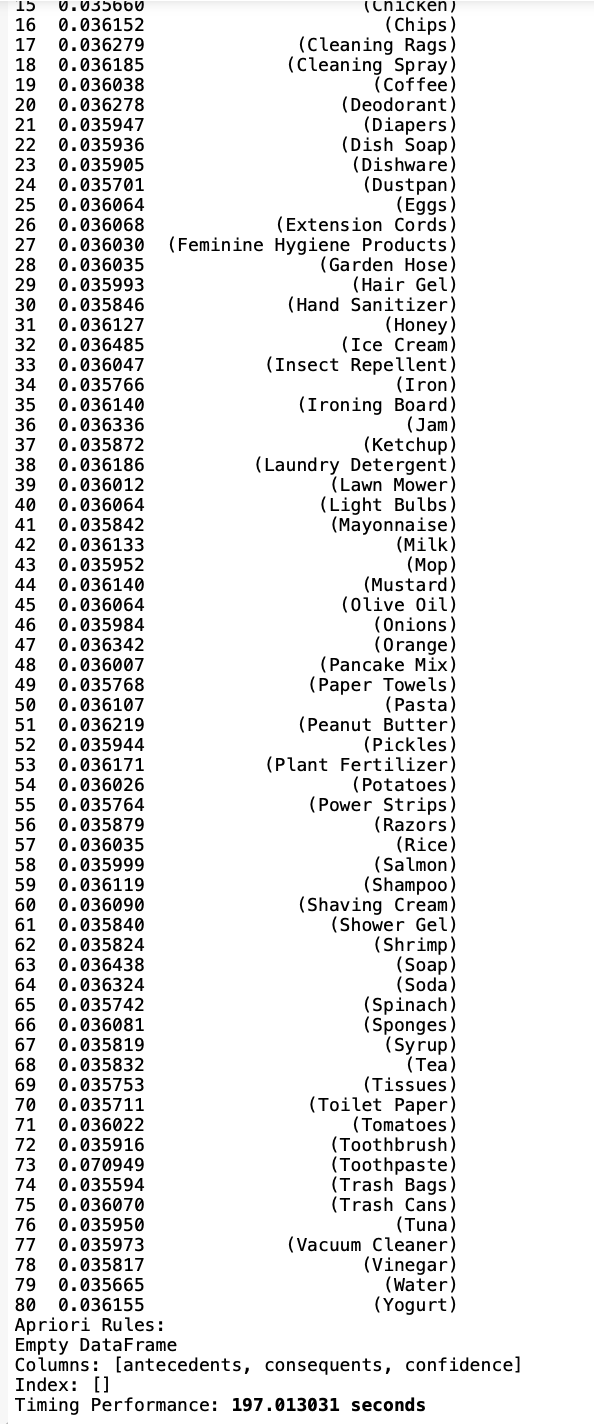

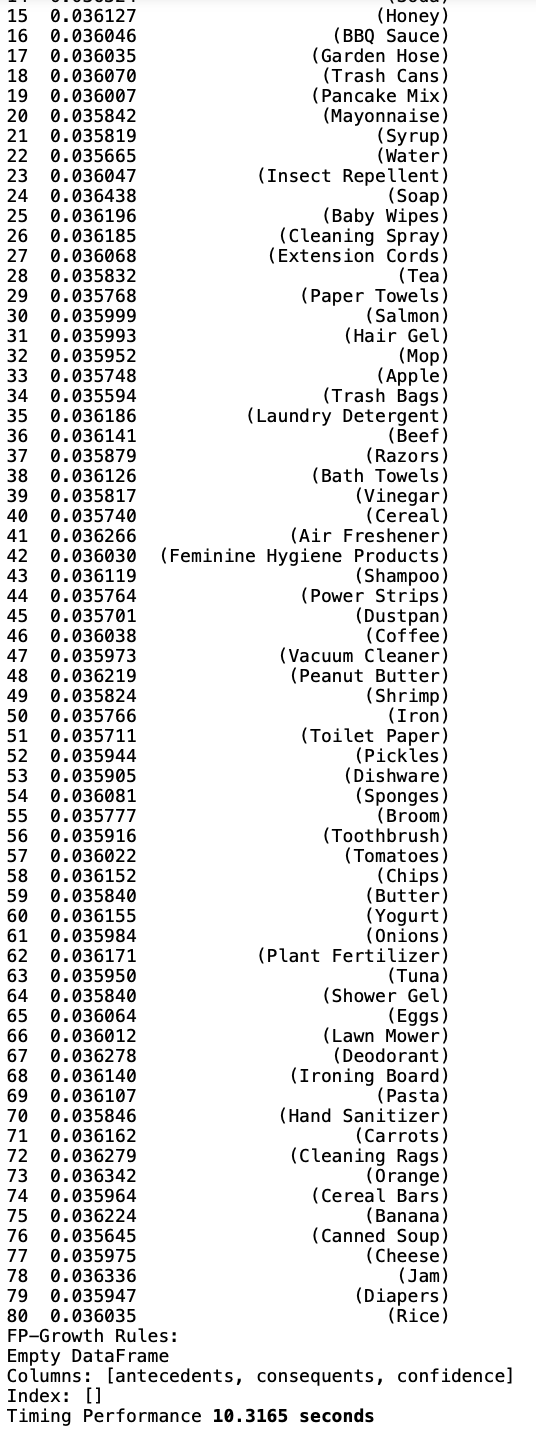

If you decide to run the code in the terminal of your computer, make sure again all the csv files and the python file are in the same folder. <br>
First, open the terminal and cd the folder where the python code and csv files are. <br>
After call the python file by: python (name of the file).py and the program will run. Insert the user inputs. Then, the code will run and output the solutions. Please find an example of it:

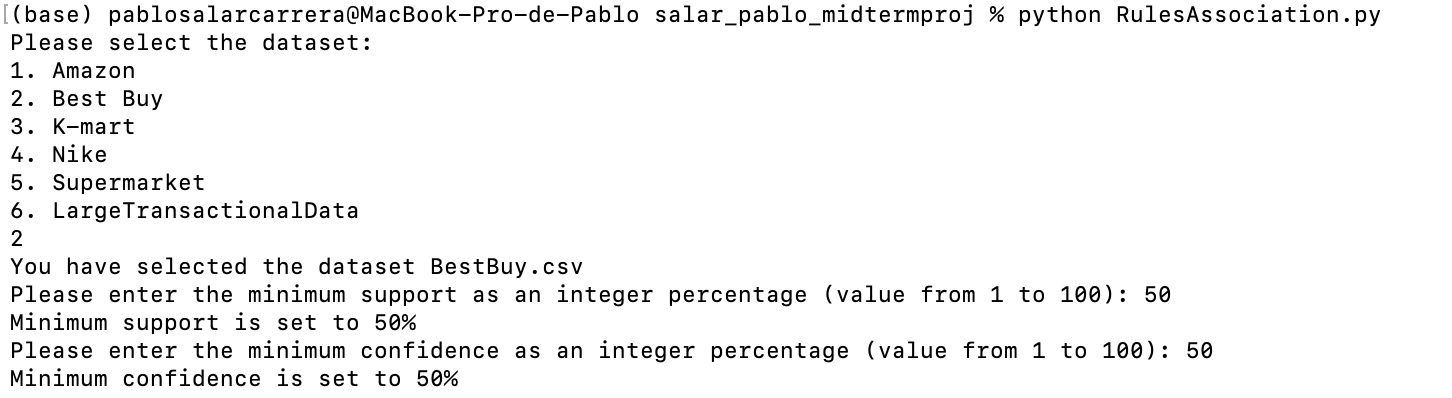

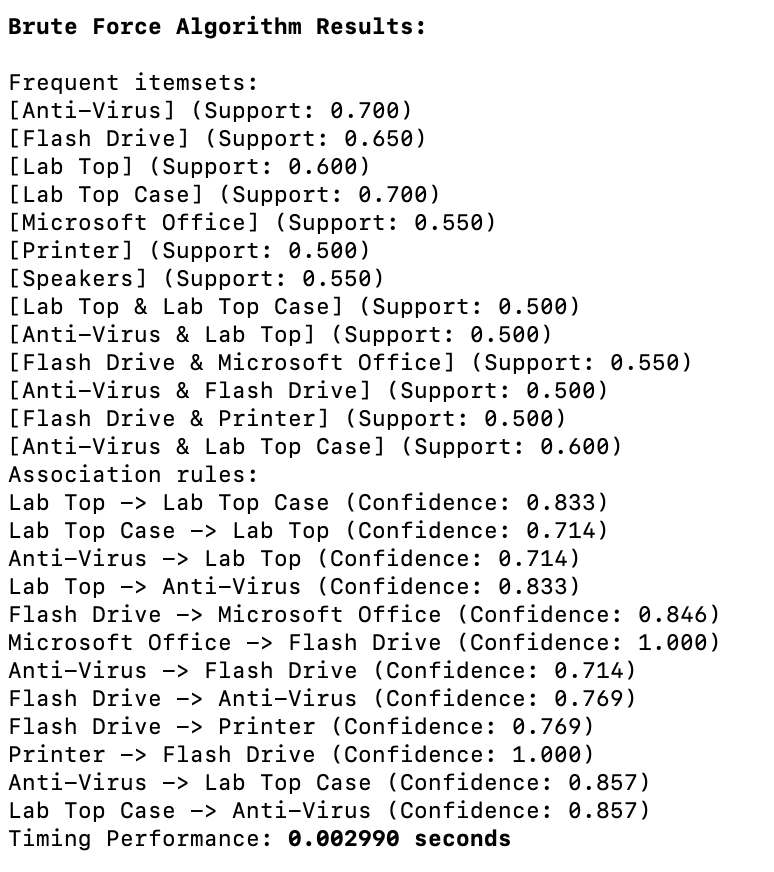

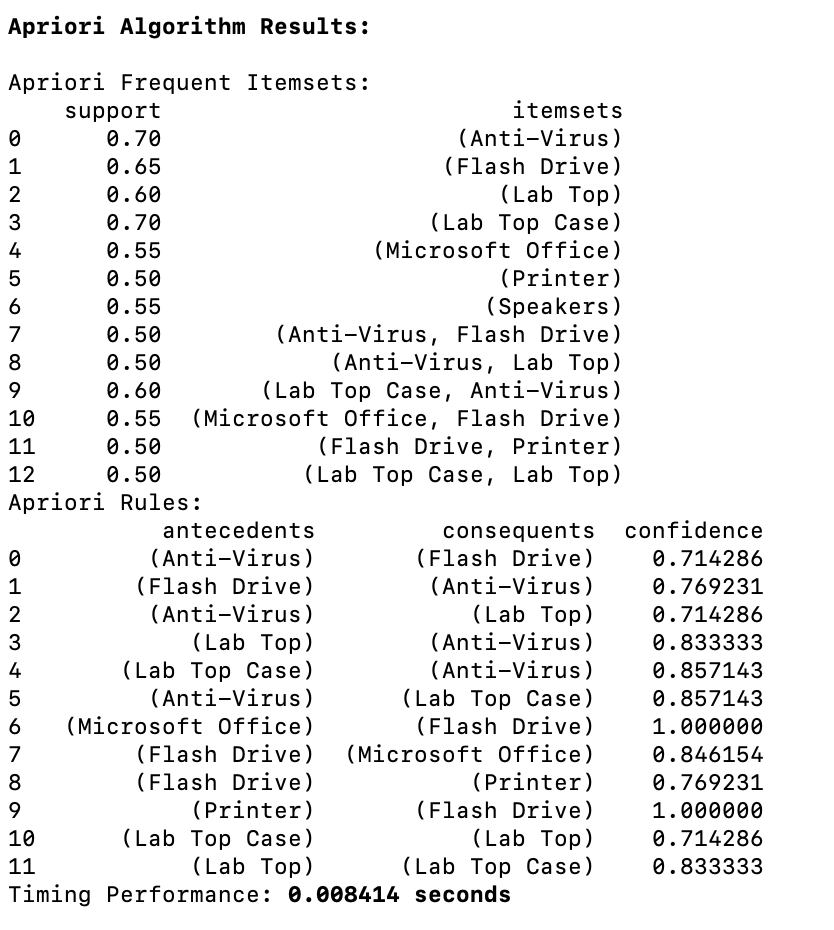

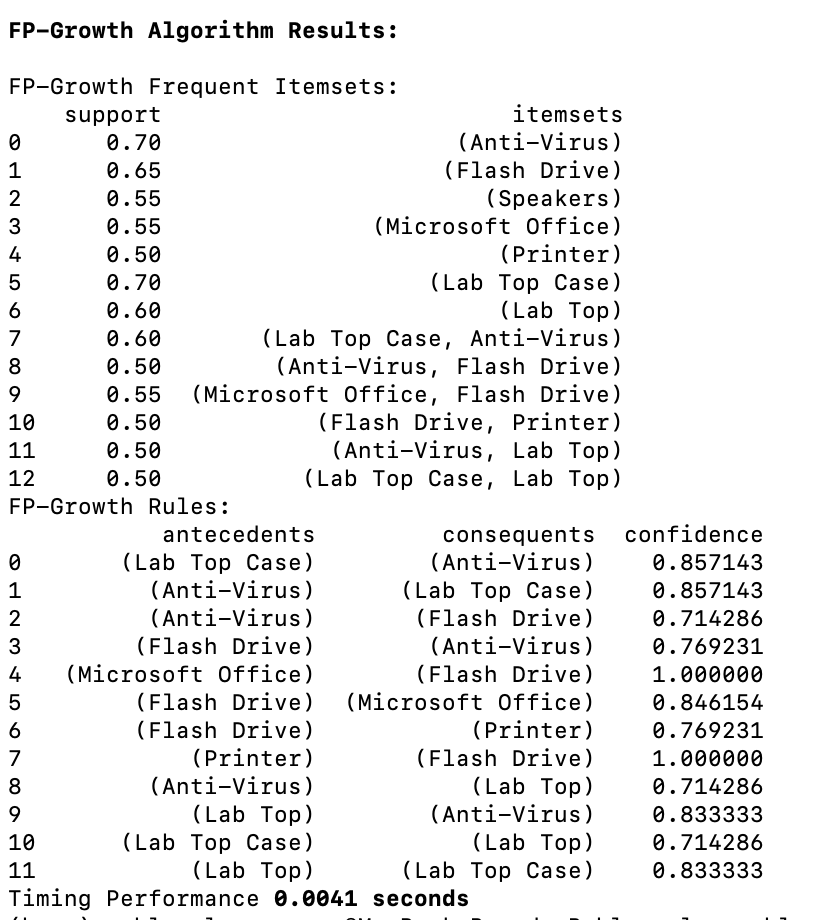